# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.16 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.1424999968148768


When finished, you can close the environment.

In [17]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

# TEST DDPG

In [6]:
import ddpg_agent
from ddpg_agent import Agent
#from ddpg_agent_PER3 import Agent
#from ddpg_agent_PER3_slow import Agent

import time
import torch
import matplotlib.pyplot as plt


In [7]:
_target_score = 30.0
_target_episodes = 100

## Define the training function
def ddpg(n_episodes=10, max_t=200):
    """Deep Deterministic Policy Gradients (DDPG).
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores = []      # episodic scores
    moving_avg = []  # moving average over 100 episodes and over all agents
    print_every = 10
    time_stamp = 0
    ## Perform n_episodes of training
    time_training_start = time.time()
    for i_episode in range(1, n_episodes+1):
        time_episode_start = time.time()
        agent.noise.reset()
        states = env.reset(train_mode=True)[brain_name].vector_observations
        scores_episode = np.zeros(num_agents)           # rewards per episode for each agent

        for t in range(1, max_t+1):
            # Perform a step: S;next_stateA;R;S'
            actions = agent.act(states)                 # select the next action for each agent
            env_info = env.step(actions)[brain_name]    # send the actions to the environment
            rewards = env_info.rewards                  # get the rewards
            next_states = env_info.vector_observations  # get the next states
            done = env_info.local_done
            #print ('actions',actions)
            # Send the results to the Agent
            for (state, action, reward, next_state, do) \
                    in zip(states, actions, rewards, next_states, done):
                agent.step(state, action, reward, next_state, do, time_stamp)
            # Update the variables for the next iteration
            states = next_states
            scores_episode += rewards
            time_stamp += 1
            #if np.any(done): # exit loop when episode ends
            #   break
        # Store the rewards and calculate the moving average
        scores.append(scores_episode.tolist())
        moving_avg.append(np.mean(scores[-_target_episodes:], axis=0))
        # Calculate the elapsed time
        time_episode = time.time() - time_episode_start
        time_elapsed = time.time() - time_training_start
        time_episode_str = time.strftime('%Mm%Ss', time.gmtime(time_episode))

        
        ## Print the results for this episode
        print('Episode {:3d} ({})\tScore: {:5.2f} (H: {:5.2f} / L: {:5.2f})\t' \
          'Moving average: {:5.2f} (H: {:5.2f} / L: {:5.2f})' \
          .format(i_episode, time_episode_str, scores_episode.mean(),
                  scores_episode.max(), scores_episode.min(),
                  moving_avg[-1].mean(), moving_avg[-1].max(),
                  moving_avg[-1].min()))
        
        if i_episode % print_every == 0:
            ## Save the model along with some training information
            time_elapsed_str = time.strftime('%Hh%Mm%Ss', time.gmtime(time_elapsed))
            checkpoint = {
                'actor_dict': agent.actor_local.state_dict(),
                'critic_dict': agent.critic_local.state_dict(),
                'ddpg_params': {
                    'batch_size': ddpg_agent.BATCH_SIZE,
                    'buffer_size': ddpg_agent.BUFFER_SIZE,
                    'gamma': ddpg_agent.GAMMA,
                    'lr_actor': ddpg_agent.LR_ACTOR,
                    'lr_critic': ddpg_agent.LR_CRITIC,
                    'tau': ddpg_agent.TAU,
                    },
                'episodes': i_episode,
                'elapsed_time': time_elapsed_str,
                'scores': scores,
                'moving_avg': moving_avg,
                }
            print('\nSaving model ...', end=' ')
            torch.save(checkpoint, 'checkpoint_ddpg.pt')
            print('done.')
            
        ## Check if the environment has been solved
        if moving_avg[-1].mean() >= _target_score :
            time_elapsed_str = time.strftime('%Hh%Mm%Ss', time.gmtime(time_elapsed))
            print('\nEnvironment solved in {:d} episodes!\t' \
                  'Average Score: {:.2f}\tElapsed time: {}'
                  .format(i_episode-_target_episodes, moving_avg[-1].mean(),
                          time_elapsed_str))
            checkpoint = {
                'actor_dict': agent.actor_local.state_dict(),
                'critic_dict': agent.critic_local.state_dict(),
                'ddpg_params': {
                    'batch_size': ddpg_agent.BATCH_SIZE,
                    'buffer_size': ddpg_agent.BUFFER_SIZE,
                    'gamma': ddpg_agent.GAMMA,
                    'lr_actor': ddpg_agent.LR_ACTOR,
                    'lr_critic': ddpg_agent.LR_CRITIC,
                    'tau': ddpg_agent.TAU,
                    },
                'episodes': i_episode,
                'elapsed_time': time_elapsed_str,
                'scores': scores,
                'moving_avg': moving_avg,
                }
            print('\nSaving model ...', end=' ')
            torch.save(checkpoint, 'checkpoint_ddpg.pt')
            print('done.')
            
            break

    return scores, moving_avg

In [ ]:
# Create the Agent
agent = Agent(state_size, action_size, random_seed=13)

# Train the Agent
scores, moving_avg = ddpg(n_episodes=1000,max_t=1000)

Using:  cuda:0
Actor network built: [Linear(in_features=33, out_features=400, bias=True), Linear(in_features=400, out_features=300, bias=True), Linear(in_features=300, out_features=4, bias=True)]
Actor network built: [Linear(in_features=33, out_features=400, bias=True), Linear(in_features=400, out_features=300, bias=True), Linear(in_features=300, out_features=4, bias=True)]
Critic network built: [Linear(in_features=33, out_features=400, bias=True), Linear(in_features=404, out_features=300, bias=True), Linear(in_features=300, out_features=1, bias=True)]
Critic network built: [Linear(in_features=33, out_features=400, bias=True), Linear(in_features=404, out_features=300, bias=True), Linear(in_features=300, out_features=1, bias=True)]
Episode   1 (03m41s)	Score:  0.85 (H:  1.52 / L:  0.08)	Moving average:  0.85 (H:  1.52 / L:  0.08)
Episode   2 (03m45s)	Score:  1.92 (H:  4.17 / L:  0.75)	Moving average:  1.38 (H:  2.83 / L:  0.82)
Episode   3 (03m46s)	Score:  1.29 (H:  2.11 / L:  0.74)	Mov

In [9]:
## Load the trained model
checkpoint = torch.load('1_checkpoint_ddpg.pt', map_location='cpu')
agent = Agent(state_size, action_size, random_seed=0)
agent.actor_local.load_state_dict(checkpoint['actor_dict'])
agent.critic_local.load_state_dict(checkpoint['critic_dict'])
agent.actor_target.load_state_dict(checkpoint['actor_dict'])
agent.critic_target.load_state_dict(checkpoint['critic_dict'])

# Train the Agent
scores, moving_avg = ddpg(n_episodes=500,max_t=800)

Using:  cuda:0
Actor network built: [Linear(in_features=33, out_features=400, bias=True), Linear(in_features=400, out_features=300, bias=True), Linear(in_features=300, out_features=4, bias=True)]
Actor network built: [Linear(in_features=33, out_features=400, bias=True), Linear(in_features=400, out_features=300, bias=True), Linear(in_features=300, out_features=4, bias=True)]
Critic network built: [Linear(in_features=33, out_features=400, bias=True), Linear(in_features=404, out_features=300, bias=True), Linear(in_features=300, out_features=1, bias=True)]
Critic network built: [Linear(in_features=33, out_features=400, bias=True), Linear(in_features=404, out_features=300, bias=True), Linear(in_features=300, out_features=1, bias=True)]
Episode   1 (02m56s)	Score:  7.27 (H: 18.65 / L:  2.47)	Moving average:  7.27 (H: 18.65 / L:  2.47)
Episode   2 (03m00s)	Score: 13.34 (H: 30.92 / L:  1.39)	Moving average: 10.31 (H: 24.78 / L:  2.93)
Episode   3 (03m03s)	Score: 12.63 (H: 23.49 / L:  2.53)	Mov

KeyboardInterrupt: 

In [ ]:
## Load the trained model
checkpoint = torch.load('2_checkpoint_ddpg.pt', map_location='cpu')
agent = Agent(state_size, action_size, random_seed=0)
agent.actor_local.load_state_dict(checkpoint['actor_dict'])
agent.critic_local.load_state_dict(checkpoint['critic_dict'])
agent.actor_target.load_state_dict(checkpoint['actor_dict'])
agent.critic_target.load_state_dict(checkpoint['critic_dict'])

# Train the Agent
scores, moving_avg = ddpg(n_episodes=500,max_t=1000)

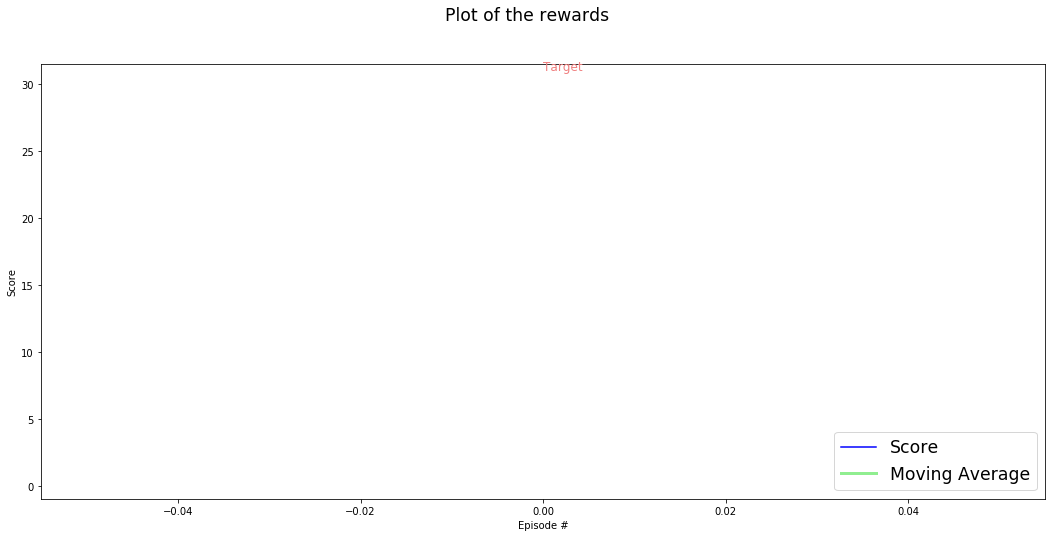

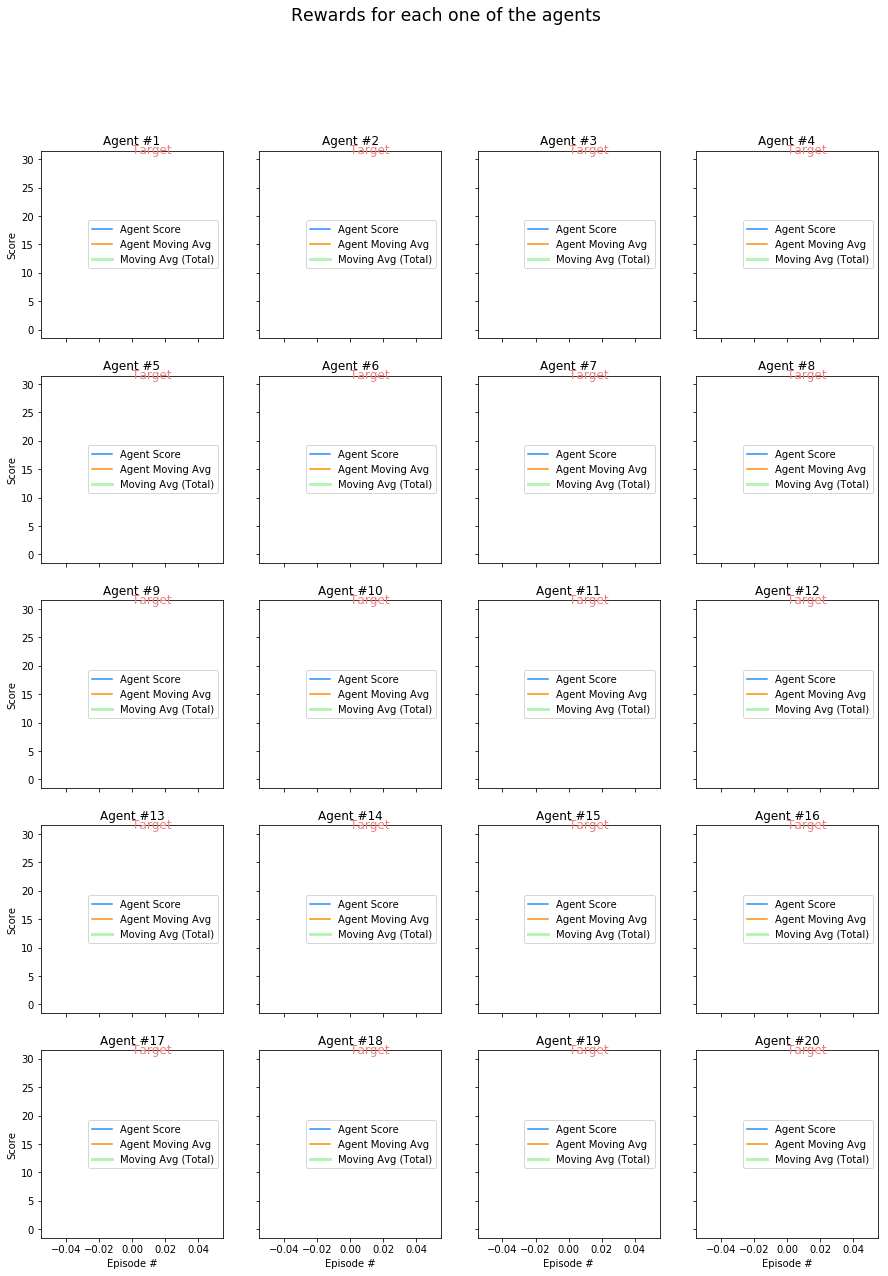

In [10]:
# Preprocess some variables
scores_mean = np.mean(scores, axis=1)
moving_avg_mean = np.mean(moving_avg, axis=1)
target = [_target_score] * len(scores) # Trace a line indicating the target value

# Plot the main graph with the scores and moving average
fig = plt.figure(figsize=(18,8))
fig.suptitle('Plot of the rewards', fontsize='xx-large')

ax = fig.add_subplot(111)
ax.plot(scores_mean, label='Score', color='Blue')
ax.plot(moving_avg_mean, label='Moving Average',
        color='LightGreen', linewidth=3)
ax.plot(target, linestyle='--', color='LightCoral', linewidth=1 )
ax.text(0, _target_score+1, 'Target', color='LightCoral', fontsize='large')
ax.set_ylabel('Score')
ax.set_xlabel('Episode #')
ax.legend(fontsize='xx-large', loc='lower right')

plt.show()

# constrained_layout=True, 
# Plot one graph for each one of the 20 Agents, if that is the case
if len(scores[0]) == 20:
    fig, axs = plt.subplots(5, 4, figsize=(15, 20),\
                            sharex=True, sharey=True)
    fig.suptitle('Rewards for each one of the agents', fontsize='xx-large')

    axs = axs.flatten()
    for idx, (ax, s, m) \
            in enumerate(zip(axs, np.transpose(scores), np.transpose(moving_avg))):
        ax.plot(s, label='Agent Score', color='DodgerBlue', zorder=2)
        ax.plot(m, label='Agent Moving Avg', color='DarkOrange', zorder=3)
        ax.plot(moving_avg_mean, label='Moving Avg (Total)',
                color='LightGreen', linewidth=3, alpha=0.655, zorder=1)
        ax.plot(target, linestyle='--', color='LightCoral', linewidth=1, zorder=0)
        ax.text(0, _target_score+1, 'Target', color='LightCoral', fontsize='large')

        ax.set_title('Agent #%d' % (idx+1))
        ax.set_ylabel('Score')
        ax.set_xlabel('Episode #')
        ax.label_outer()
        ax.legend(fontsize='medium')

    plt.show()

In [26]:
## Load the trained model
checkpoint = torch.load('checkpoint_ddpg.pt', map_location='cpu')
agent = Agent(state_size, action_size, random_seed=0)
agent.actor_local.load_state_dict(checkpoint['actor_dict'])
agent.critic_local.load_state_dict(checkpoint['critic_dict'])

FileNotFoundError: [Errno 2] No such file or directory: 'checkpoint_ddpg.pt'